<a href="https://colab.research.google.com/github/Raul2104/Raul2104.github.io/blob/main/Copia_de_Logistic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project

For this project you will use the Iris dataset of the package Scikit-Learn.

For simplicity, they are used the first two dimensions (sepal length and width) of the iris dataset to train a logistic-regression classifiers.

A straight line must be seen in the plot, showing how logistic regression attempts to draw a straight line that will best clasify the first class from the others in the dataset.

## Your work to do

Your work is to implement tow functions:

1. costFunction: a function that using a logistic model computes the cost for the theta coefficients and its gradient

2. predict: a function to compute the hypothesis of your logistic model returning a label

Also, you should use `scipy.optimize` to optimize your model, i.e., to fit the model to your data.

Finally, after an analysis from the comparison, you have to answer the questions.

Extra points: Separate the three classes.
## Comparison

The coefficients are calculated, in order to compare with scikit-learn logistic model.

The plot could look like, you may only separate the blue class from others.

![logistic plot](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_logistic_001.png)

## Iris dataset
For reference on the dataset you may visit [https://scikit-learn.org/stable/datasets/toy_dataset.html]

The famous Iris database, first used by Sir R.A. Fisher.
This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Data Set Characteristics:

    Number of Instances  |  150 (50 in each of three classes)
    Number of Attributes |  4 numeric, predictive attributes and the class
    Attribute Information|  sepal length in cm
                            sepal width in cm
                            petal length in cm
                            petal width in cm
                            class:
                                Iris-Setosa
                                Iris-Versicolour
                                Iris-Virginica
    Class Distribution   |  33.3% for each of 3 classes.



In [ ]:
!pip install scikit-learn
!pip install scipy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from scipy.optimize import minimize

In [ ]:

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = np.where(iris.target < 0.5,1,0) # we only take the first class.
Y = Y.reshape(Y.size,1)

X = (X - X.mean())/X.std()
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.concatenate((np.ones((m,1)), X), axis=1) # Add a column of ones to x

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

In [ ]:
def sigmoid(z):
    '''
        SIGMOID Compute sigmoid functoon
        J = SIGMOID(z) computes the sigmoid of z.
    '''

    # You need to return the following variables correctly
    if not isinstance(z, np.ndarray):
        z = np.array(z)
    #one = np.ones(z.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).
    #g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))
    # =============================================================
    return g

In [ ]:
# Logistic model
# Cost function and Gradient
# If you get a "nan" cost while optimizing it may be due a mulplication of zero by inf. You may avoid this error by clamping the value of log
#    log_h = np.log(h)
#    log_1h = np.log(1-h)
#    log_h[np.isinf(log_h)]=np.finfo(float).max
#    log_1h[np.isinf(log_1h)]=np.finfo(float).max

def costFunction(theta, X, y):
    cost = np.zeros(1)
    grad = np.zeros(theta.shape)

    #You have to complete this function

    return cost.item(), grad

In [ ]:
# Train the model using the training sets

# Using scipy optimize the cost function
options={'maxiter':1000, 'gtol':1e-5,'disp': True}
solution = minimize(costFunction, initial_theta, args=(X, Y),jac=True, options=options)
cost = solution['fun']
theta = solution['x']
# Print theta to screen
print('Cost at theta found by minimize function: ', cost)
# The coefficients
print('Coefficients (theta): \n', theta)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Cost at theta found by minimize function:  0.0
Coefficients (theta): 
 [0. 0. 0.]


In [ ]:
#Don't forget to take your values to 0 and 1
#    p = np.where(h > 0.5,1,0)

def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''

    m, n = X.shape
    p = np.zeros((m, 1))

    #You have to complete this function

    return p

/tmp/ipython-input-2818407896.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 1], X[:, 2], edgecolors='k', cmap=plt.cm.Paired)


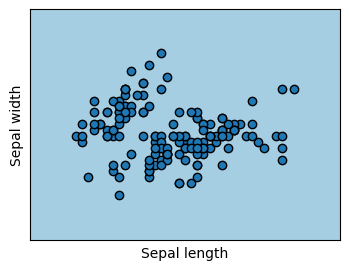

In [ ]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(theta, np.c_[np.ones(xx.size),xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 1], X[:, 2], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

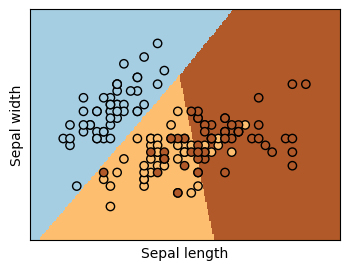

In [ ]:
# Now compare your result with that from Scikit-Learn
Xlr = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(Xlr, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xlr[:, 0].min() - .5, Xlr[:, 0].max() + .5
y_min, y_max = Xlr[:, 1].min() - .5, Xlr[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(Xlr[:, 0], Xlr[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', logreg.intercept_[0], logreg.coef_[0])
# The mean squared error

## Questions

1. Did you perform a data preprocessing (Standardization, Scaling, Normalization, Categorical Encoding or Imputation)?
2. Are the model parameters theta the same as the intercept and coefficients from scikit-learn? Why do you think that this happens? They represent (almost) the same line?
3. Do you have to modify the two functions that you implemented in order to fit a model that uses more than two features of the dataset?
4. How you can use one-hot encoding to classify the three classes?